
###*Pontificia Universidad Javeriana*

**Fecha**: 2 de octubre 2024

**Profesor**: John Corredor, PhD

**Materia**: Procesamiento de Alto Volumen de Datos

**Objetivo**: Segundo Parcial **Modelo A**

###**Nombre Estudiante**: Martinez Patiño, Camilo

###**ID Estudiante**: 20439630

**Contexto**
- Se presenta un conjunto de datos (dataset) los cuales representan las ventas de productos en el año 2019
- Cada dataset tiene los siguientes campos
     
      - ID Orden: identificador de orden de compra
     
      - Producto: Descripción de producto
     
      - Cantidad Ordenada: cantidad de productos del mismo tipo ordenados/pedidos/comprados
     
      - Precio Unitarios: valor comercial del producto
     
      - Fecha: fecha del producto vendido, formato: mes/día/año hora
     
      - Dirección de compra: dirección de venta del producto, formato: dirección, ciudad, iniciales del departamento

- El conjunto de datos se ubica en la carpeta del [enlace](<https://github.com/corredor-john/ExploratoryDataAnalisys/tree/main/Ventas>)
- A continuación de se presenta los pasos a seguir a para el desarrollo del parcial

##1. Cargar las bibliotecas necesarias y la sesión PYSPARK

In [0]:
#import findspark
#findspark.init()

import requests
import io  

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
#import squarify
from sklearn.metrics import roc_curve, auc

#Biblioteca PySpark
import warnings
import pyspark
from pyspark.context import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import DoubleType, IntegerType
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import input_file_name, mean, col, split, regexp_extract, when, lit, isnan, count, udf, isnan, month, to_timestamp, split, concat, avg
from pyspark import SparkFiles

#Bioblioteca ML para PySpark
from pyspark.ml import Pipeline

#Importar el SO
from time import time
from pyspark.conf import SparkConf
import os

Como se esta usando Databricks no es necesario crear la session de saprk de igual manera dejo el codigo


In [0]:
#SPARK_MASTER_URL = os.getenv("SPARK_MASTER_URL", "spark://10.43.103.125:7077")
#configura = SparkConf()
#configura.setMaster(SPARK_MASTER_URL)
#configura.set('spark.local.dir', '/almacen')
#configura.setAppName("PrimerSparkMartinez")
#spark = SparkSession.builder.config(conf=configura).getOrCreate()
#SQLContext(sparkContext=spark.sparkContext, sparkSession=spark)
#spark = spark.sparkContext

### Revisar si El servicio esta vivo

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

##2. DataFrame PySpark (10 pts)
####2.1.- Crear un dataframe PySpark con los conjuntos de datos de la carpeta dada en el enlace

In [0]:
#Creo un lista con las direcciónes de los datos
urls = ["https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/refs/heads/main/Ventas/Ventas_April_2019.csv",
        "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/refs/heads/main/Ventas/Ventas_August_2019.csv",
        "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/refs/heads/main/Ventas/Ventas_December_2019.csv",
        "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/refs/heads/main/Ventas/Ventas_February_2019.csv",
        "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/refs/heads/main/Ventas/Ventas_January_2019.csv",
        "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/refs/heads/main/Ventas/Ventas_July_2019.csv",
        "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/refs/heads/main/Ventas/Ventas_June_2019.csv",
        "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/refs/heads/main/Ventas/Ventas_March_2019.csv",
        "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/refs/heads/main/Ventas/Ventas_May_2019.csv",
        "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/refs/heads/main/Ventas/Ventas_November_2019.csv",
        "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/refs/heads/main/Ventas/Ventas_October_2019.csv",
        "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/refs/heads/main/Ventas/Ventas_September_2019.csv"]
# Crear una lista para almacenar los DataFrames
dfs = []

# Iterar sobre cada URL
for url in urls:
    # Descargar el contenido del archivo
    contenido = requests.get(url).content
    
    # Convertir el contenido en un DataFrame usando io.StringIO
    df = pd.read_csv(io.StringIO(contenido.decode('utf-8')))
    
    # Limpiar los nombres de columnas eliminando espacios innecesarios
    
    dfs.append(df)

# Concatenar todos los DataFrames en uno solo con pandas
df_pandas_total = pd.concat(dfs, ignore_index=True)

# Convertir el DataFrame de pandas a un DataFrame de Spark
df_spark_total = spark.createDataFrame(df_pandas_total)
# Concatenar todos los DataFrames en uno solo con pandas
df_pandas_total = pd.concat(dfs, ignore_index=True)

# Convertir el DataFrame de pandas a un DataFrame de Spark
df_spark_total = spark.createDataFrame(df_pandas_total)

# mostrar algunas filas del DataFrame en Spark
df_spark_total.show()

root
 |-- ID Orden: string (nullable = true)
 |-- Producto : string (nullable = true)
 |--  Cantidad Ordenada: string (nullable = true)
 |-- Precio Unitario : string (nullable = true)
 |-- Fecha: string (nullable = true)
 |-- Dirección de Compra: string (nullable = true)

+--------+--------------------+------------------+----------------+--------------+--------------------+
|ID Orden|           Producto | Cantidad Ordenada|Precio Unitario |         Fecha| Dirección de Compra|
+--------+--------------------+------------------+----------------+--------------+--------------------+
|  171346|Cable de Carga US...|                 1|           46900|04/04/19 19:25|631 calle Boyacá,...|
|  171347|Parlante Google H...|                 1|          159900|04/19/19 07:19|546 calle 5ta, Me...|
|  171348|AAA Batteries (4-...|                 1|           12990|04/22/19 22:41|593 calle 8va, Ma...|
|  171349|Cable de Carga US...|                 1|           46900|04/09/19 04:59|571 calle 4ta, Me...|

In [0]:
df_spark_total.columns

Out[4]: ['ID Orden',
 'Producto ',
 ' Cantidad Ordenada',
 'Precio Unitario ',
 'Fecha',
 'Dirección de Compra']

####2.2.- Presentar el tipo de datos del dataframe spark (5 pts)

In [0]:
df_spark_total.printSchema()

root
 |-- ID Orden: string (nullable = true)
 |-- Producto : string (nullable = true)
 |--  Cantidad Ordenada: string (nullable = true)
 |-- Precio Unitario : string (nullable = true)
 |-- Fecha: string (nullable = true)
 |-- Dirección de Compra: string (nullable = true)



####2.3.-Se requiere cambiar los nombres de las columnas: (3 pts)
  - 'Producto '->'Producto'
  - ' Cantidad Ordenada'->'Cantidad'
  - 'Precio Unitario '->'Precio_Unitario'

In [0]:
# Renombrar las columnas específicas usando withColumnRenamed en Spark
df_spark_total = df_spark_total.withColumnRenamed('Producto ', 'Producto') \
                               .withColumnRenamed(' Cantidad Ordenada', 'Cantidad') \
                               .withColumnRenamed('Precio Unitario ', 'Precio_Unitario') \
                                .withColumnRenamed('ID Orden','ID_Orden')

In [0]:
df_spark_total.columns

Out[7]: ['ID_Orden',
 'Producto',
 'Cantidad',
 'Precio_Unitario',
 'Fecha',
 'Dirección de Compra']

####2.4.- Convertir las columnas requeridas a los tipos de datos correspondientes (2 pts)

In [0]:
df00 = df_spark_total
#df00.printSchema()
df00 = df00.withColumn("Cantidad", col("Cantidad").cast(DoubleType())) \
    .withColumn("Precio_Unitario", col("Precio_Unitario").cast(DoubleType()))\
        .withColumn("Cantidad", col("Cantidad").cast(IntegerType()))\
            .withColumn("ID_Orden", col("ID_Orden").cast(IntegerType()))\
                .withColumn('Fecha', to_timestamp(df00['Fecha'], 'MM/dd/yy HH:mm'))
                
                

                                
df00.printSchema()

root
 |-- ID_Orden: integer (nullable = true)
 |-- Producto: string (nullable = true)
 |-- Cantidad: integer (nullable = true)
 |-- Precio_Unitario: double (nullable = true)
 |-- Fecha: timestamp (nullable = true)
 |-- Dirección de Compra: string (nullable = true)



##3.- Creación de variables: derivación de variables *(20pts)*

####3.1.-Se requiere Crear nueva columna **Mes** a partir de la columna *Fecha* (5 pts)

In [0]:
df01 = df00
df01.columns

Out[9]: ['ID_Orden',
 'Producto',
 'Cantidad',
 'Precio_Unitario',
 'Fecha',
 'Dirección de Compra']

In [0]:
# Crear la nueva columna 'Mes'
df01 = df01.withColumn('Mes', month(df01['Fecha']))

# Mostrar el DataFrame resultante
df01.show()


+--------+--------------------+--------+---------------+-------------------+--------------------+---+
|ID_Orden|            Producto|Cantidad|Precio_Unitario|              Fecha| Dirección de Compra|Mes|
+--------+--------------------+--------+---------------+-------------------+--------------------+---+
|  171346|Cable de Carga US...|       1|        46900.0|2019-04-04 19:25:00|631 calle Boyacá,...|  4|
|  171347|Parlante Google H...|       1|       159900.0|2019-04-19 07:19:00|546 calle 5ta, Me...|  4|
|  171348|AAA Batteries (4-...|       1|        12990.0|2019-04-22 22:41:00|593 calle 8va, Ma...|  4|
|  171349|Cable de Carga US...|       1|        46900.0|2019-04-09 04:59:00|571 calle 4ta, Me...|  4|
|  171350|Cable de Carga US...|       1|        46900.0|2019-04-18 09:36:00|883 calle Madison...|  4|
|  171351|Cable de Carga Li...|       1|        64900.0|2019-04-21 16:44:00|988 calle Avenida...|  4|
|  171352|Cable de Carga Li...|       1|        64900.0|2019-04-23 09:20:00|568 ca

####3.2.-Se requiere Crear 3 nuevas columnas (**Dirección**, **Ciudad**, **Departamento**) a partir de la columna *Dirección de Compra* (5 pts)

In [0]:
df02 = df01

# Dividir la columna 'Dirección de Compra' en partes
# Asumiendo que el formato es "Dirección, Ciudad, Departamento"
df02 = df02.withColumn('Dirección', split(df02['Dirección de Compra'], ',').getItem(0)) \
            .withColumn('Ciudad', split(df02['Dirección de Compra'], ',').getItem(1)) \
            .withColumn('Departamento', split(df02['Dirección de Compra'], ',').getItem(2))

# Mostrar el DataFrame resultante
df02.show()


+--------+--------------------+--------+---------------+-------------------+--------------------+---+--------------------+----------+------------+
|ID_Orden|            Producto|Cantidad|Precio_Unitario|              Fecha| Dirección de Compra|Mes|           Dirección|    Ciudad|Departamento|
+--------+--------------------+--------+---------------+-------------------+--------------------+---+--------------------+----------+------------+
|  171346|Cable de Carga US...|       1|        46900.0|2019-04-04 19:25:00|631 calle Boyacá,...|  4|    631 calle Boyacá|   Armenia|          QU|
|  171347|Parlante Google H...|       1|       159900.0|2019-04-19 07:19:00|546 calle 5ta, Me...|  4|       546 calle 5ta|  Medellin|          AN|
|  171348|AAA Batteries (4-...|       1|        12990.0|2019-04-22 22:41:00|593 calle 8va, Ma...|  4|       593 calle 8va| Manizalez|          CA|
|  171349|Cable de Carga US...|       1|        46900.0|2019-04-09 04:59:00|571 calle 4ta, Me...|  4|       571 calle 

In [0]:
df02.columns

Out[12]: ['ID_Orden',
 'Producto',
 'Cantidad',
 'Precio_Unitario',
 'Fecha',
 'Dirección de Compra',
 'Mes',
 'Dirección',
 'Ciudad',
 'Departamento']

####3.3.-Se requiere crear una nueva columna 'Ciudad(Departamento)', a partir de las columnas Ciudad y Departamento (5 pts)

In [0]:
# Crear la nueva columna 'Ciudad(Departamento)' concatenando 'Ciudad' y 'Departamento'
df02 = df02.withColumn('Ciudad(Departamento)', concat(col('Ciudad'), lit('('), col('Departamento'), lit(')')))
df02.show()

+--------+--------------------+--------+---------------+-------------------+--------------------+---+--------------------+----------+------------+--------------------+
|ID_Orden|            Producto|Cantidad|Precio_Unitario|              Fecha| Dirección de Compra|Mes|           Dirección|    Ciudad|Departamento|Ciudad(Departamento)|
+--------+--------------------+--------+---------------+-------------------+--------------------+---+--------------------+----------+------------+--------------------+
|  171346|Cable de Carga US...|       1|        46900.0|2019-04-04 19:25:00|631 calle Boyacá,...|  4|    631 calle Boyacá|   Armenia|          QU|        Armenia( QU)|
|  171347|Parlante Google H...|       1|       159900.0|2019-04-19 07:19:00|546 calle 5ta, Me...|  4|       546 calle 5ta|  Medellin|          AN|       Medellin( AN)|
|  171348|AAA Batteries (4-...|       1|        12990.0|2019-04-22 22:41:00|593 calle 8va, Ma...|  4|       593 calle 8va| Manizalez|          CA|      Manizale

In [0]:
df02.columns

Out[14]: ['ID_Orden',
 'Producto',
 'Cantidad',
 'Precio_Unitario',
 'Fecha',
 'Dirección de Compra',
 'Mes',
 'Dirección',
 'Ciudad',
 'Departamento',
 'Ciudad(Departamento)']

####3.4.- Eliminar las columnas: 'Dirección de Compra', 'Ciudad', 'Departamento' (5 pts)

In [0]:
df02 = df02.drop('Dirección de Compra', 'Ciudad', 'Departamento')
df02.show()

+--------+--------------------+--------+---------------+-------------------+---+--------------------+--------------------+
|ID_Orden|            Producto|Cantidad|Precio_Unitario|              Fecha|Mes|           Dirección|Ciudad(Departamento)|
+--------+--------------------+--------+---------------+-------------------+---+--------------------+--------------------+
|  171346|Cable de Carga US...|       1|        46900.0|2019-04-04 19:25:00|  4|    631 calle Boyacá|        Armenia( QU)|
|  171347|Parlante Google H...|       1|       159900.0|2019-04-19 07:19:00|  4|       546 calle 5ta|       Medellin( AN)|
|  171348|AAA Batteries (4-...|       1|        12990.0|2019-04-22 22:41:00|  4|       593 calle 8va|      Manizalez( CA)|
|  171349|Cable de Carga US...|       1|        46900.0|2019-04-09 04:59:00|  4|       571 calle 4ta|       Medellin( AN)|
|  171350|Cable de Carga US...|       1|        46900.0|2019-04-18 09:36:00|  4|   883 calle Madison|          Neiva( HU)|
|  171351|Cable 

##4.- Limpieza de Datos y Análisis Exploratorio de Datos (40 pts)

####4.1.- Se requiere una tabla que presente la cantidad de datos nulos por variable (1pts)

In [0]:


# Contar los valores nulos por columna
null_counts = df02.select([
    count(when(col(c).isNull(), c)).alias(c) for c in df02.columns
])

# Mostrar el resultado
null_counts.show(truncate=False)


+--------+--------+--------+---------------+-----+---+---------+--------------------+
|ID_Orden|Producto|Cantidad|Precio_Unitario|Fecha|Mes|Dirección|Ciudad(Departamento)|
+--------+--------+--------+---------------+-----+---+---------+--------------------+
|799     |496     |799     |799            |799  |799|496      |799                 |
+--------+--------+--------+---------------+-----+---+---------+--------------------+



####4.2.- Se requiere que los valores nulos encontrados de la variable Producto, sean cambiados por el producto más vendido (8 pts)

In [0]:
# 1. Calcular el producto más vendido
producto_mas_vendido = df02.groupBy("Producto") \
    .agg(count("Cantidad").alias("Cantidad_Vendida")) \
    .orderBy(col("Cantidad_Vendida").desc()) \
    .first()[0]  # Obtiene el nombre del producto más vendido
print(producto_mas_vendido)

# 2. Reemplazar los valores nulos en la columna Producto
df02 = df02.withColumn(
    "Producto",
    when(col("Producto").isNull(), producto_mas_vendido).otherwise(col("Producto"))
)

# Mostrar el DataFrame actualizado
df02.show(truncate=False)

Cable de Carga USB-C P/O
+--------+---------------------------------+--------+---------------+-------------------+---+--------------------+--------------------+
|ID_Orden|Producto                         |Cantidad|Precio_Unitario|Fecha              |Mes|Dirección           |Ciudad(Departamento)|
+--------+---------------------------------+--------+---------------+-------------------+---+--------------------+--------------------+
|171346  |Cable de Carga USB-C P/O         |1       |46900.0        |2019-04-04 19:25:00|4  |631 calle Boyacá    | Armenia( QU)       |
|171347  |Parlante Google HomeMini         |1       |159900.0       |2019-04-19 07:19:00|4  |546 calle 5ta       | Medellin( AN)      |
|171348  |AAA Batteries (4-pack)           |1       |12990.0        |2019-04-22 22:41:00|4  |593 calle 8va       | Manizalez( CA)     |
|171349  |Cable de Carga USB-C P/O         |1       |46900.0        |2019-04-09 04:59:00|4  |571 calle 4ta       | Medellin( AN)      |
|171350  |Cable de Carg

In [0]:
# Contar los valores nulos por columna
null_counts = df02.select([
    count(when(col(c).isNull(), c)).alias(c) for c in df02.columns
])

# Mostrar el resultado
null_counts.show(truncate=False)

+--------+--------+--------+---------------+-----+---+---------+--------------------+
|ID_Orden|Producto|Cantidad|Precio_Unitario|Fecha|Mes|Dirección|Ciudad(Departamento)|
+--------+--------+--------+---------------+-----+---+---------+--------------------+
|799     |0       |799     |799            |799  |799|496      |799                 |
+--------+--------+--------+---------------+-----+---+---------+--------------------+



####4.3.-Se requiere saber el promedio de precios de cada Producto (1 pts)

In [0]:
# Calcular el promedio de precios de cada producto
promedio_precios = df02.groupBy("Producto") \
    .agg(avg("Precio_Unitario").alias("Promedio_Precio")) \
    .orderBy("Producto")  # Opcional: ordenar por nombre de producto

# Mostrar el resultado
promedio_precios.show(truncate=False)

+---------------------------------+---------------+
|Producto                         |Promedio_Precio|
+---------------------------------+---------------+
|AA Batteries (4-pack)            |13800.0        |
|AAA Batteries (4-pack)           |12990.0        |
|Asus VivoBook X420FA-BV Laptop   |1950900.0      |
|Audifonos Apple Airpods          |499900.0       |
|Audifonos Bose SoundSport        |399900.0       |
|Cable de Carga Lightning         |64900.0        |
|Cable de Carga USB-C P/O         |46900.0        |
|Freidora Air Fryer Kalley K-MAF25|198849.0       |
|Freidora Saludable B&D 3.5 Litros|229900.0       |
|Horno Microondas 0.8P Samsung AGE|309900.0       |
|LG Lavadora 19Kg Inv WT19        |1646900.0      |
|LG Secadora Carga Frontal        |1646900.0      |
|Macbook Air MQD32E/A 128GB 13.3" |2799000.0      |
|Motorola G8 Plus Red             |729900.0       |
|Multiolla Oster 0150 Negra PE    |299900.0       |
|Parlante Google HomeMini         |159900.0       |
|Producto   

####4.4.- Se requiere que se sustituya los valores Nulos de la variable 'Precio_Unitario', cuando la variable Producto sea:
          - Cable de Carga USB-C P/O
          - Cable de Carga Lightning
####por el precio promedio de los dos productos anteriores (8 pts).

In [0]:
# 1. Calcular el precio promedio de los productos especificados
promedio_precio = df02.filter(col("Producto").isin(["Cable de Carga USB-C P/O", "Cable de Carga Lightning"])) \
    .agg(avg("Precio_Unitario").alias("Promedio_Precio")) \
    .first()[0]  # Obtener el precio promedio

# 2. Reemplazar los valores nulos en 'Precio_Unitario'
df02 = df02.withColumn(
    "Precio_Unitario",
    when((col("Producto").isin(["Cable de Carga USB-C P/O", "Cable de Carga Lightning"])) & col("Precio_Unitario").isNull(), promedio_precio)
    .otherwise(col("Precio_Unitario"))
)

In [0]:
# Contar los valores nulos por columna
null_counts = df02.select([
    count(when(col(c).isNull(), c)).alias(c) for c in df02.columns
])

# Mostrar el resultado
null_counts.show(truncate=False)

+--------+--------+--------+---------------+-----+---+---------+--------------------+
|ID_Orden|Producto|Cantidad|Precio_Unitario|Fecha|Mes|Dirección|Ciudad(Departamento)|
+--------+--------+--------+---------------+-----+---+---------+--------------------+
|799     |0       |799     |303            |799  |799|496      |799                 |
+--------+--------+--------+---------------+-----+---+---------+--------------------+



####4.5.- ¿Cúantos valores nulos quedaron de la variable Precio_Unitario? (1pts)

De acuerdo a la consulta a nulos de el recuadro anterior quedan  *303* valores nulos de los *799* originales. es decir que la limpieza cambio  *496* valores nulos

####4.6.- Elimine los valores nulos restantes del Dataframe (verifique) (2pts)

In [0]:
# 3. Eliminar los valores nulos restantes
df02 = df02.dropna()

In [0]:
# Contar los valores nulos por columna
null_counts = df02.select([
    count(when(col(c).isNull(), c)).alias(c) for c in df02.columns
])

# Mostrar el resultado
null_counts.show(truncate=False)

+--------+--------+--------+---------------+-----+---+---------+--------------------+
|ID_Orden|Producto|Cantidad|Precio_Unitario|Fecha|Mes|Dirección|Ciudad(Departamento)|
+--------+--------+--------+---------------+-----+---+---------+--------------------+
|0       |0       |0       |0              |0    |0  |0        |0                   |
+--------+--------+--------+---------------+-----+---+---------+--------------------+



####4.7.- Haga una tabla y un gráfico histograma de cantidad de ventas por mes (8pts)

In [0]:
# 1. Agrupar por mes y contar las ventas
ventas_por_mes = df02.groupBy(month("Fecha").alias("Mes")) \
    .agg(count("ID_Orden").alias("Cantidad_Ventas")) \
    .orderBy("Mes")

# 2. Mostrar la tabla
ventas_por_mes.show(truncate=False)

+---+---------------+
|Mes|Cantidad_Ventas|
+---+---------------+
|1  |12505          |
|2  |10309          |
|3  |8528           |
|4  |11691          |
|5  |13002          |
|6  |16631          |
|7  |14193          |
|8  |18607          |
|9  |3846           |
|10 |15113          |
|11 |15972          |
|12 |24007          |
+---+---------------+



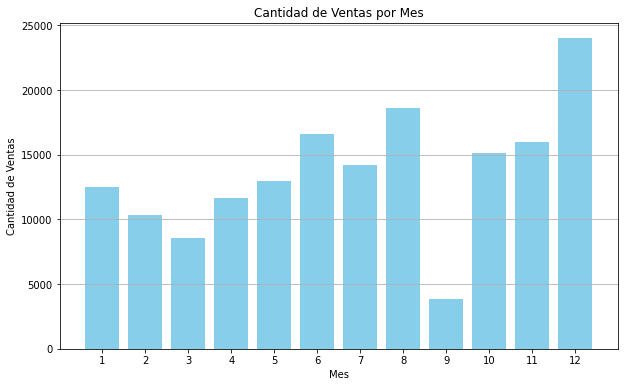

In [0]:
# Convertir a Pandas para graficar
ventas_por_mes_pd = ventas_por_mes.toPandas()

# 3. Crear un gráfico de histograma
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_mes_pd["Mes"], ventas_por_mes_pd["Cantidad_Ventas"], color='skyblue')
plt.xlabel("Mes")
plt.ylabel("Cantidad de Ventas")
plt.title("Cantidad de Ventas por Mes")
plt.xticks(ventas_por_mes_pd["Mes"])  # Para mostrar todos los meses
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()

####4.8.- Presente un resumen estadístico del dataframe (1pts)

In [0]:
# Obtener un resumen estadístico del DataFrame
resumen_estadistico = df02.describe()

# Mostrar el resumen estadístico
resumen_estadistico.show(truncate=False)

+-------+------------------+---------------------+------------------+-----------------+------------------+----------------+--------------------+
|summary|ID_Orden          |Producto             |Cantidad          |Precio_Unitario  |Mes               |Dirección       |Ciudad(Departamento)|
+-------+------------------+---------------------+------------------+-----------------+------------------+----------------+--------------------+
|count  |164404            |164404               |164404            |164404           |164404            |164404          |164404              |
|mean   |220325.19272645435|null                 |1.1008004671419187|333562.6252098489|7.104413517919272 |null            |null                |
|stddev |45683.163051430776|null                 |0.3854176568137229|535070.6738140973|3.5244336335174045|null            |null                |
|min    |141234            |AA Batteries (4-pack)|1                 |12990.0          |1                 |1 calle 10ma    | Armeni

####4.9.- Se requiere presentar la cantidad de ventas por Ciudad(Departamento) y hacer un histograma (8pts).

In [0]:
# 1. Agrupar por Ciudad(Departamento) y contar las ventas
ventas_por_ciudad = df02.groupBy("Ciudad(Departamento)") \
    .agg(count("ID_Orden").alias("Cantidad_Ventas")) \
    .orderBy("Cantidad_Ventas", ascending=False)  # ordenar por cantidad de ventas

# 2. Mostrar la tabla
ventas_por_ciudad.show(truncate=False)

+--------------------+---------------+
|Ciudad(Departamento)|Cantidad_Ventas|
+--------------------+---------------+
| Medellin( AN)      |39476          |
| Armenia( QU)       |26298          |
| Cúcuta( NS)        |21996          |
| Bogotá( CU)        |17674          |
| Cali( VC)          |13261          |
| Manizalez( CA)     |13031          |
| Ibagué( TO)        |13030          |
| Barranquilla( AT)  |8840           |
| Bucaramanga( SA)   |8618           |
| Neiva( HU)         |2180           |
+--------------------+---------------+



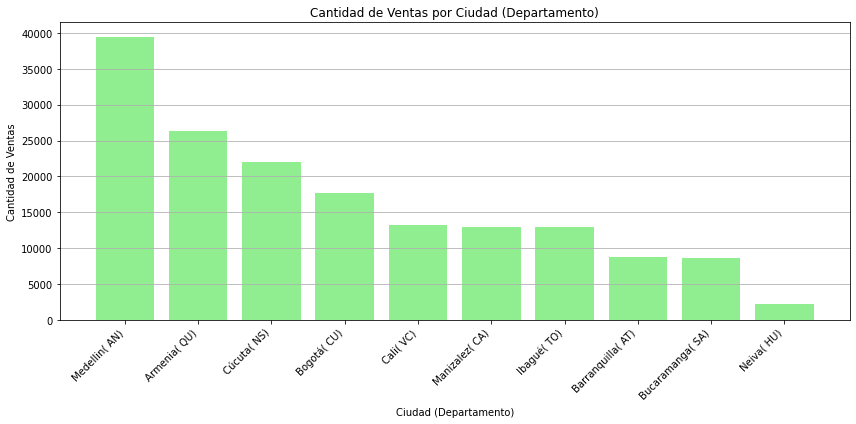

In [0]:
# Convertir a Pandas para graficar
ventas_por_ciudad_pd = ventas_por_ciudad.toPandas()

# 3. Crear un gráfico de histograma
plt.figure(figsize=(12, 6))
plt.bar(ventas_por_ciudad_pd["Ciudad(Departamento)"], ventas_por_ciudad_pd["Cantidad_Ventas"], color='lightgreen')
plt.xlabel("Ciudad (Departamento)")
plt.ylabel("Cantidad de Ventas")
plt.title("Cantidad de Ventas por Ciudad (Departamento)")
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor legibilidad
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout
plt.show()

##5.-Responda justificando las siguientes preguntas (30 pts):
#### 5.1.- Escriba 5 observaciones de la gráfica *4.7* (10 pts)

- El mes con más venats fue diciembre (12) con un poco menos de 25000 ventas
- El mes con menos ventas fue septiembre con un poco menos de 5000 ventas
- Junio (6), Julio (7), Octubre (10) & Noviembre (11) Tuvieron una cantidad de ventas casi iguales
- El mayor incremento de venats ocurrio de Septiembre (9) a Octubre (10)
- El menor salto fue de Octubre (10) a Noviembre (11)

#### 5.2.-¿Cúal fue la ciudad que más productos vendió? (5 pts)

La ciudad que mas vendio fue la de Medellín ubicada en Antioquia, con un poco menos de 40000 ventas.

#### 5.3.-¿Cúal es el producto más vendido? (5 pts)

Usando los estadisticos del punto *4.8* sabemos que el producto mas vendido fue _'AA Batteries (4-pack)'_.

#### 5.4.-¿Cúal es el producto menos vendido? (5 pts)

Usando los estadisticos del punto *4.8* sabemos que el producto menos vendido fue _'Xiaomi REDMI Note 8'_.

#### 5.5.-¿Cúal es la proporción de ventas de la ciudad que más vendió productos? (5 pts)

In [0]:
# 1. Agrupar por Ciudad(Departamento) y contar las ventas
ventas_por_ciudad = df02.groupBy("Ciudad(Departamento)") \
    .agg(count("ID_Orden").alias("Cantidad_Ventas"))

# 2. Obtener la ciudad con la mayor cantidad de ventas
ciudad_max_ventas = ventas_por_ciudad.orderBy(col("Cantidad_Ventas").desc()).first()

# 3. Calcular la cantidad total de ventas
total_ventas = df02.count()

# 4. Calcular la proporción de ventas de la ciudad que más vendió
proporcion = ciudad_max_ventas.Cantidad_Ventas / total_ventas if total_ventas > 0 else 0

# Mostrar resultados
print(f"Ciudad con más ventas: {ciudad_max_ventas['Ciudad(Departamento)']}")
print(f"Cantidad de ventas en esa ciudad: {ciudad_max_ventas['Cantidad_Ventas']}")
print(f"Total de ventas: {total_ventas}")
print(f"Proporción de ventas de la ciudad que más vendió: {proporcion:.2%}")

Ciudad con más ventas:  Medellin( AN)
Cantidad de ventas en esa ciudad: 39476
Total de ventas: 164404
Proporción de ventas de la ciudad que más vendió: 24.01%


Se podia sacar a mano pero decidi usar las tablas generasdas en el numeral 4 para sacarlo con copdigo. Podeemos ver qeu la proporción de ventas de medellin la cual fue la ciudad con más ventas fue de 24.01% lo que equivale a casi 1/4 de las ventas totales.